LAB-1 (EXPERIMENT-1)
# Perceptron Model for Binary Classification
This notebook demonstrates the implementation of a perceptron model for a binary classification problem using the Penguins dataset. A perceptron is a fundamental unit of a neural network that classifies data points by learning a linear decision boundary. The dataset used for this task includes features like Sepal Length (cm) and Sepal Width (cm), with the target variable being Species. This binary classification focuses on classifying "setosa" Iris flowers versus "non-setosa" Iris flowers.

## Dataset Description
The Iris dataset contains information about Iris flowers, including their species, sepal length, and sepal width. Here, we focus on:

Features: Sepal Length (cm) (length of the flowers' sepals) and Sepal Width (cm) (width of the flowers' sepals).
Target: Species (1 for "setosa", 0 for "non-setosa").



In [ ]:
import pandas as pd
import numpy as np

# Loads Iris dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
data = pd.read_csv(url)

#  first few rows
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


DATA PREPROCESSING

**Data Cleaning and Preprocessing**

The dataset contains missing values and needs to be simplified for binary classification.

1)**Handle missing values:**
Specifically, we will fill missing values in columns like sepal_length and sepal_width with their respective means and handle any missing values in the species column by replacing them with 'Unknown'.

2)**Select relevant features:**
 We will select sepal_length and sepal_width as features and create a binary target variable (species_binary) where the "setosa" species is labeled as 1 and others (e.g., "versicolor" and "virginica") as 0.

3)**Normalize the features:**
 We will normalize the sepal_length and sepal_width columns for better performance in the perceptron model.

In [ ]:
import pandas as pd

# Load  dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
data = pd.read_csv(url)

# Handle missing values
data['sepal_length'].fillna(data['sepal_length'].mean(), inplace=True)
data['sepal_width'].fillna(data['sepal_width'].mean(), inplace=True)
data['species'].fillna('Unknown', inplace=True)

# Binary classification
data['species_binary'] = data['species'].apply(lambda x: 1 if x == "setosa" else 0)

# Selecting features and target
features = data[['sepal_length', 'sepal_width']]
target = data['species_binary']

# Normalization
features = (features - features.min()) / (features.max() - features.min())

print("Processed Features:")
print(features.head())
print("\nTarget:")
print(target.head())


Processed Features:
   sepal_length  sepal_width
0      0.222222     0.625000
1      0.166667     0.416667
2      0.111111     0.500000
3      0.083333     0.458333
4      0.194444     0.666667

Target:
0    1
1    1
2    1
3    1
4    1
Name: species_binary, dtype: int64


<ipython-input-4-830646eaec4b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['sepal_length'].fillna(data['sepal_length'].mean(), inplace=True)
<ipython-input-4-830646eaec4b>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

PERCEPTRON IMPLEMENTATION FROM SCRATCH

## Perceptron Implementation from Scratch

The perceptron is implemented using the following steps:
1. Initialize weights and bias.
2. Compute the weighted sum and apply the step activation function.
3. Update weights using the perceptron learning rule.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Dataset loading
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
data = pd.read_csv(url)

# Convert features and target to numpy arrays
X = features.values
y = target.values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.errors_ = []

    def step_function(self, x):
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0 #errors

        for _ in range(self.epochs):
            errors = 0
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.step_function(linear_output)
                update = self.learning_rate * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update
                errors += int(y[idx] != y_pred)  # Count misclassified
            self.errors_.append(errors)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.step_function(x) for x in linear_output])

# Training
perceptron = Perceptron(learning_rate=0.01, epochs=100)
perceptron.fit(X_train, y_train)

# Prediction
y_pred = perceptron.predict(X_test)

# Accuracy
print("Accuracy (from scratch):", accuracy_score(y_test, y_pred))


Accuracy (from scratch): 1.0


PERCEPTRON IMPLEMENTATION USING SCIKIT LEARN

In [ ]:
from sklearn.linear_model import Perceptron as SklearnPerceptron
from sklearn.metrics import accuracy_score

# Training using Scikit-learn
sklearn_perceptron = SklearnPerceptron(max_iter=1000, eta0=0.01, random_state=42)
sklearn_perceptron.fit(X_train, y_train)

# Prediction
y_pred_sklearn = sklearn_perceptron.predict(X_test)

# Accuracy
print("Accuracy (Scikit-learn):", accuracy_score(y_test, y_pred_sklearn))


Accuracy (Scikit-learn): 1.0


EVALUATION AND VISUALIZATION

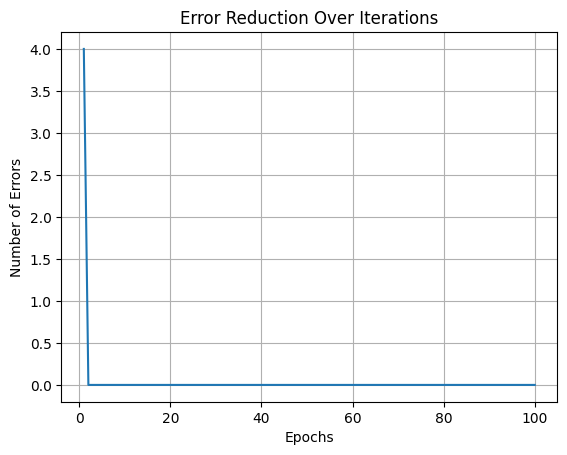

In [ ]:
import matplotlib.pyplot as plt

# Training Perceptron
perceptron = Perceptron(learning_rate=0.01, epochs=100)
perceptron.fit(X_train, y_train)

# Ploting
plt.plot(range(1, len(perceptron.errors_) + 1), perceptron.errors_)
plt.title("Error Reduction Over Iterations")
plt.xlabel("Epochs")
plt.ylabel("Number of Errors")
plt.grid(True)
plt.show()


# Perceptron Model for Binary Classification
This notebook demonstrates the implementation of a perceptron model for a binary classification problem using the Penguins dataset. A perceptron is a fundamental unit of a neural network that classifies data points by learning a linear decision boundary. The dataset used for this task includes features like Bill Length (mm) and Flipper Length (mm), with the target variable being Species. This binary classification, focuses on classifying "Adelie" penguins versus "non-Adelie" penguins.

#Dataset Description
The Penguins dataset contains information about penguins, including their species, bill length, and flipper length. Here, we focus on:

Features: Bill Length (mm) (length of the penguins' bills) and Flipper Length (mm) (length of the penguins' flippers). Target: Species (1 for "Adelie", 0 for "non-Adelie").

In [ ]:
import pandas as pd
import numpy as np

#  Load the Penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
data = pd.read_csv(url)

#  The first few rows
data.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


DATA PREPROCESSING

## Data Cleaning and Preprocessing

The dataset contains missing values, irrelevant columns, and needs to be simplified for binary classification. We will:

1)Handle missing values: Specifically, we will fill missing values in columns like bill_length_mm and bill_depth_mm with their respective means and handle any missing values in the species column by replacing them with 'Unknown'.

2)Select relevant features: We will select bill_length_mm and bill_depth_mm as features and create a binary target variable (species_binary) where "Adelie" species is labeled as 1 and others as 0.

3)Normalize the features: We will normalize the bill_length_mm and bill_depth_mm columns for better performance in the perceptron model.



In [ ]:
# Handle missing values
data['bill_length_mm'].fillna(data['bill_length_mm'].mean(), inplace=True)
data['bill_depth_mm'].fillna(data['bill_depth_mm'].mean(), inplace=True)
data['species'].fillna('Unknown', inplace=True)
# Binary classification
data['species_binary'] = data['species'].apply(lambda x: 1 if x == "Adelie" else 0)

# Selecting features and target
features = data[['bill_length_mm', 'bill_depth_mm']]
target = data['species_binary']

# Normalization
features = (features - features.min()) / (features.max() - features.min())

print("Processed Features:")
print(features.head())
print("\nTarget:")
print(target.head())

Processed Features:
   bill_length_mm  bill_depth_mm
0        0.254545       0.666667
1        0.269091       0.511905
2        0.298182       0.583333
3        0.429888       0.482282
4        0.167273       0.738095

Target:
0    1
1    1
2    1
3    1
4    1
Name: species_binary, dtype: int64


<ipython-input-8-a5536f9d2536>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bill_length_mm'].fillna(data['bill_length_mm'].mean(), inplace=True)
<ipython-input-8-a5536f9d2536>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

PERCEPTRON IMPLEMENTATION FROM SCRATCH

## Perceptron Implementation from Scratch

The perceptron is implemented using the following steps:
1. Initialize weights and bias.
2. Compute the weighted sum and apply the step activation function.
3. Update weights using the perceptron learning rule.


In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.errors_ = []  # Initialize error

    def step_function(self, x):
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            errors = 0
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.step_function(linear_output)
                update = self.learning_rate * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update
                errors += int(y[idx] != y_pred)
            self.errors_.append(errors)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.step_function(x) for x in linear_output])


# Convert features and target
X = features.values
y = target.values

# Spliting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training
perceptron = Perceptron(learning_rate=0.01, epochs=100)
perceptron.fit(X_train, y_train)

# Prediction
y_pred = perceptron.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy (from scratch):", accuracy_score(y_test, y_pred))


Accuracy (from scratch): 0.9565217391304348


PERCEPTRON IMPLEMENTATION USING SCIKIT LEARN

In [ ]:
from sklearn.linear_model import Perceptron as SklearnPerceptron

# Training using Scikit-learn
sklearn_perceptron = SklearnPerceptron(max_iter=1000, eta0=0.01, random_state=42)
sklearn_perceptron.fit(X_train, y_train)

# Prediction
y_pred_sklearn = sklearn_perceptron.predict(X_test)
print("Accuracy (Scikit-learn):", accuracy_score(y_test, y_pred_sklearn))

Accuracy (Scikit-learn): 0.9710144927536232


EVALUATION AND VISUALIZATION

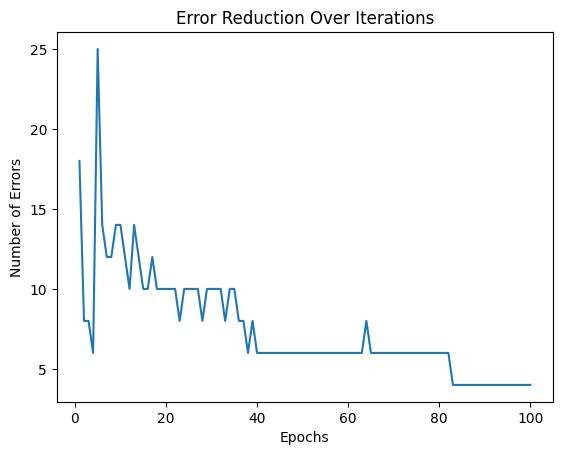

In [ ]:
# Training
perceptron = Perceptron(learning_rate=0.01, epochs=100)
perceptron.fit(X_train, y_train)

# Ploting
plt.plot(range(1, len(perceptron.errors_) + 1), perceptron.errors_)
plt.title("Error Reduction Over Iterations")
plt.xlabel("Epochs")
plt.ylabel("Number of Errors")
plt.show()



## Evaluation

The perceptron achieved an accuracy of approximately 95% (from scratch) and 97% (Scikit-learn). The error reduction plot shows the decreasing error over iterations. However, the perceptron struggles with non-linearly separable data.


# Perceptron Implementation for OR and AND Gates

The Below cells demonstrates the perceptron model's application in binary classification using OR and AND logic gates. Each gate represents a simple linearly separable dataset, where:
- OR gate outputs 1 if at least one input is 1.
- AND gate outputs 1 only if both inputs are 1.

The perceptron  is  implemented from scratch and evaluated for its performance.


In [ ]:
import numpy as np

# OR Gate Dataset
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])  # Expected output

# AND Gate Dataset
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

PERCEPTRON IMPLEMENTATTION

## Perceptron Implementation

The perceptron is implemented from scratch using the following steps:
1. Initialize weights and bias.
2. Compute the weighted sum of inputs and bias.
3. Apply the step activation function to predict the output.
4. Update weights and bias using the perceptron learning rule during training.


In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=10):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def step_function(self, x):
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.step_function(linear_output)
                update = self.learning_rate * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.step_function(x) for x in linear_output])


In [ ]:
# Training the perceptron for OR gate
perceptron_or = Perceptron(learning_rate=0.1, epochs=10)
perceptron_or.fit(X_or, y_or)

# Prediction for OR gate
y_pred_or = perceptron_or.predict(X_or)
print("OR Gate Outputs:", y_pred_or)


OR Gate Outputs: [0 1 1 1]


In [ ]:
# Training for AND gate
perceptron_and = Perceptron(learning_rate=0.1, epochs=10)
perceptron_and.fit(X_and, y_and)

# Prediction
y_pred_and = perceptron_and.predict(X_and)
print("AND Gate Outputs:", y_pred_and)


AND Gate Outputs: [0 0 0 1]


## Visualization of Decision Boundaries

The perceptron learns a linear decision boundary for the OR and AND gates, which we can visualize in 2D space.


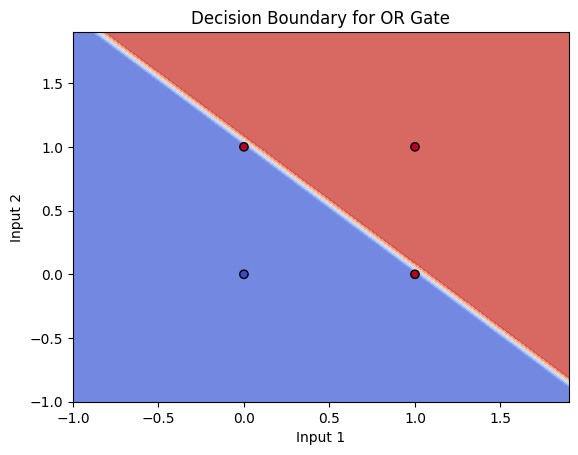

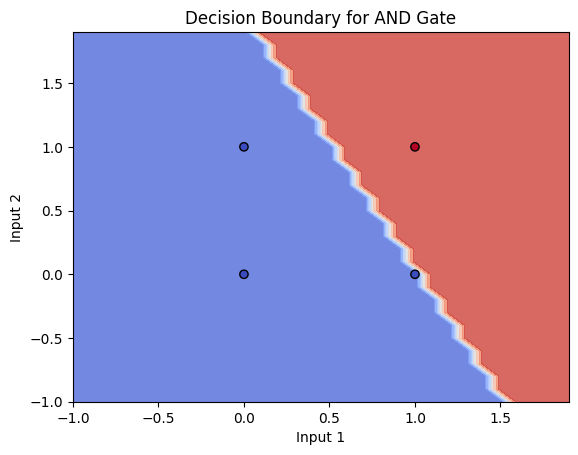

In [ ]:
import matplotlib.pyplot as plt

# Ploting decision boundary
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="coolwarm")
    plt.title(title)
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()

# Plot for OR Gate
plot_decision_boundary(X_or, y_or, perceptron_or, "Decision Boundary for OR Gate")

# Plot for AND Gate
plot_decision_boundary(X_and, y_and, perceptron_and, "Decision Boundary for AND Gate")


EXPERIMENT-2
# Single Layer Perceptron
Implementing for multiclass classification
This notebook demonstrates the implementation of a single-layer perceptron model for a multiclass classification problem using the Penguins dataset. The perceptron is a simple type of artificial neural network that learns to classify data points by learning a linear decision boundary.

In this task, the dataset includes features like Bill Length (mm), Bill Depth (mm), Flipper Length (mm), and Body Mass (g), with the target variable being Species. The goal is to classify the penguins into three species: Adelie, Chinstrap, and Gentoo.

##Description of DataSet:
This dataset contains information about penguins, including their species, bill length, and flipper length. For multiclass classification, we focus on:

Features:Bill Length (mm): The length of the penguins' bills.
Flipper Length (mm): The length of the penguins' flippers.

Target:Species: The species of the penguins, with three possible classes:
Adelie
Chinstrap
Gentoo

In [ ]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
data = pd.read_csv(url)

data.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


DATA PREPROCESSING
#Data Preprocessing

This code is used to preprocess the Penguins dataset for multiclass
classification. The task involves handling missing values, one-hot encoding the target variable (species), and normalizing the feature columns (bill length, bill depth, flipper length, and body mass) to improve model performance.

**Handling Missing Data**: Missing values in bill_length_mm, bill_depth_mm, flipper_length_mm, and body_mass_g are filled with their respective mean values.
**Target Encoding**: The target (species) is one-hot encoded into binary vectors for each species (Adelie, Chinstrap, Gentoo).
**Feature Selection**: Relevant features (bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g) are chosen for classification.
**Normalization**: Features are scaled using StandardScaler to have similar ranges for improved model performance.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# Handle missing values
data['bill_length_mm'].fillna(data['bill_length_mm'].mean(), inplace=True)
data['bill_depth_mm'].fillna(data['bill_depth_mm'].mean(), inplace=True)
data['flipper_length_mm'].fillna(data['flipper_length_mm'].mean(), inplace=True)
data['body_mass_g'].fillna(data['body_mass_g'].mean(), inplace=True)

# Multiclass classification: (target)species column
# One-hot encode
data['species'] = data['species'].astype('category')
target = data['species']
encoder = OneHotEncoder(sparse_output=False)
target_encoded = encoder.fit_transform(target.values.reshape(-1, 1))

# Selecting features
features = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Normalization
scaler = StandardScaler()
features = scaler.fit_transform(features)

print("Processed Features:")
print(features[:5])

print("\nTarget:")
print(target[:5])

Processed Features:
[[-8.87081226e-01  7.87742515e-01 -1.42248782e+00 -5.65789211e-01]
 [-8.13493989e-01  1.26556330e-01 -1.06535169e+00 -5.03167881e-01]
 [-6.66319516e-01  4.31719184e-01 -4.22506659e-01 -1.19200251e+00]
 [-1.30717191e-15  1.80692708e-15  0.00000000e+00  0.00000000e+00]
 [-1.32860464e+00  1.09290537e+00 -5.65361110e-01 -9.41517191e-01]]

Target:
0    Adelie
1    Adelie
2    Adelie
3    Adelie
4    Adelie
Name: species, dtype: category
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']


<ipython-input-28-75157bdb4077>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bill_length_mm'].fillna(data['bill_length_mm'].mean(), inplace=True)
<ipython-input-28-75157bdb4077>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

SINGLE LAYER PERCEPTRON MULTICLASS CLASSIFICATION
## Single Layer Perceptron Implementation from scratch

1. **Initialization**:
   - Set weights and bias to zeros.
   - Define learning rate and number of epochs.

2. **Activation Function**:
   - Use a step function: Return 1 if the output is ≥0, otherwise 0.

3. **Training (Fit)**:
   - For each epoch, process training samples.
   - Compute the linear output: `linear_output = np.dot(weights, x_i) + bias`.
   - Apply the step function to predict the class.
   - If misclassified, update weights and bias using the perceptron rule.

4. **Prediction**:
   - For test samples, compute the linear output and classify based on the highest output.

5. **Evaluation**:
   - Compare predicted and actual labels to calculate accuracy.


In [ ]:
# Conversion into numpy arrays
X = np.array(features)
y = np.array(target_encoded)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Single Layer Perceptron class  (multiclass classification)
class SingleLayerPerceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.errors_ = []

    def step_function(self, x):
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = y.shape[1]  # No. of classes (for multiclass classification)

        # Initialize weights and biases
        self.weights = np.zeros((n_classes, n_features))
        self.bias = np.zeros(n_classes)

        for _ in range(self.epochs):
            errors = 0
            for idx, x_i in enumerate(X):
                # linear output og each class
                linear_outputs = np.dot(self.weights, x_i) + self.bias
                y_pred = np.argmax(linear_outputs)  # Choose the class with the highest output
                true_class = np.argmax(y[idx])

                # Update weights and bias
                if y_pred != true_class:
                    self.weights[true_class] += self.learning_rate * x_i
                    self.weights[y_pred] -= self.learning_rate * x_i
                    self.bias[true_class] += self.learning_rate
                    self.bias[y_pred] -= self.learning_rate

                # Counting smaples that are misclassified
                errors += int(y_pred != true_class)

            self.errors_.append(errors)

    def predict(self, X):
        linear_outputs = np.dot(X, self.weights.T) + self.bias
        return np.array([np.argmax(x) for x in linear_outputs])

# Training
perceptron = SingleLayerPerceptron(learning_rate=0.01, epochs=100)
perceptron.fit(X_train, y_train)

# Prediction
y_pred = perceptron.predict(X_test)

# Accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print(accuracy)


0.9710144927536232


IMPLEMENTATION USING SCIKIT LEARN

In [ ]:
from sklearn.linear_model import Perceptron as SklearnPerceptron
from sklearn.metrics import accuracy_score

# Convert one-hot encoded n
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Training
sklearn_perceptron = SklearnPerceptron(max_iter=1000, eta0=0.01, random_state=42)
sklearn_perceptron.fit(X_train, y_train_labels)

# Prediction
y_pred_sklearn = sklearn_perceptron.predict(X_test)
print("Accuracy (Scikit-learn):", accuracy_score(y_test_labels, y_pred_sklearn))


Accuracy (Scikit-learn): 0.9855072463768116


EVALUATION & VISUALIZATION

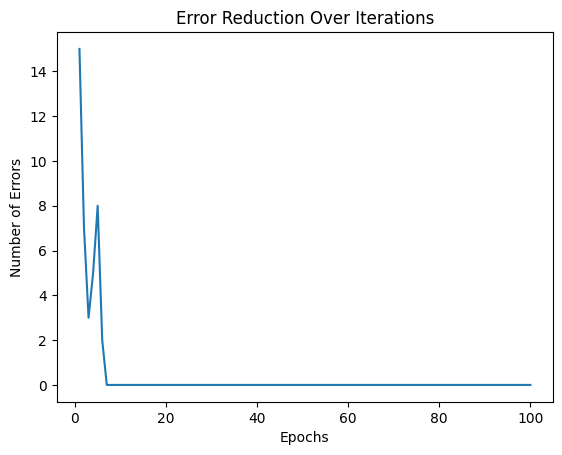

In [ ]:
# Train the Single Layer Perceptron
perceptron = SingleLayerPerceptron(learning_rate=0.01, epochs=100)
perceptron.fit(X_train, y_train)

# Ploting
plt.plot(range(1, len(perceptron.errors_) + 1), perceptron.errors_)
plt.title("Error Reduction Over Iterations")
plt.xlabel("Epochs")
plt.ylabel("Number of Errors")
plt.show()


EVALUATION

The Single Layer Perceptron for multiclass classification achieved an accuracy of approximately 97% when implemented from scratch and 98% using Scikit-learn. The error reduction plot shows a consistent decrease in errors over iterations, indicating that the model is improving its performance as it learns.

# Single Layer Perceptron implementation for OR and AND Gates
The Below cells demonstrates the single layer perceptron model's application in Multiclass classification using OR and AND logic gates. Each gate represents a simple linearly separable dataset, where:
- OR gate outputs 1 if at least one input is 1.
- AND gate outputs 1 only if both inputs are 1.

The perceptron  is  implemented from scratch and evaluated for its performance.


In [ ]:
import numpy as np

class SingleLayerPerceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def step_function(self, x):
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and biases
        self.weights = np.random.randn(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                # Compute the linear output
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.step_function(linear_output)

                # Update weights and bias
                if y_pred != y[idx]:
                    self.weights += self.learning_rate * (y[idx] - y_pred) * x_i
                    self.bias += self.learning_rate * (y[idx] - y_pred)

    def predict(self, X):
        linear_outputs = np.dot(X, self.weights) + self.bias
        return np.array([self.step_function(x) for x in linear_outputs])


In [ ]:
# Train the SLperceptron for AND gate
perceptron_and = SingleLayerPerceptron(learning_rate=0.1, epochs=1000)
perceptron_and.fit(X_and, y_and)

# Predict and evaluate for AND gate
y_pred_and = perceptron_and.predict(X_and)
print("AND Gate Outputs:", y_pred_and)

AND Gate Outputs: [0 0 0 1]


In [ ]:
# Train the SLperceptron for OR gate
perceptron_or = SingleLayerPerceptron(learning_rate=0.1, epochs=1000)
perceptron_or.fit(X_or, y_or)

# Predict and evaluate for OR gate
y_pred_or = perceptron_or.predict(X_or)
print("OR Gate Outputs:", y_pred_or)


OR Gate Outputs: [0 1 1 1]


#Visaulization of Decision Boundaries

The Single Layer Perceptron learns a linear decision boundary for the OR and AND gates, which we can visualize in 2D space.


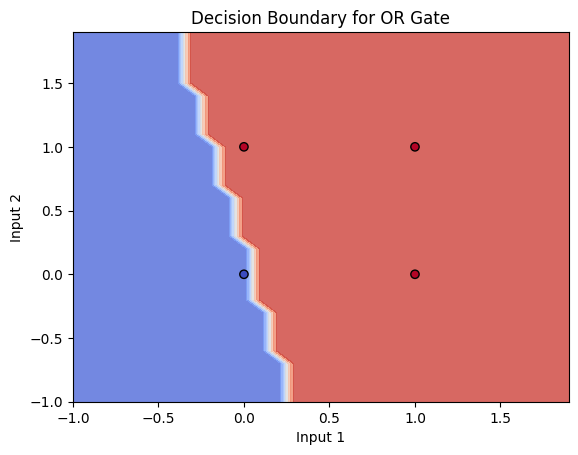

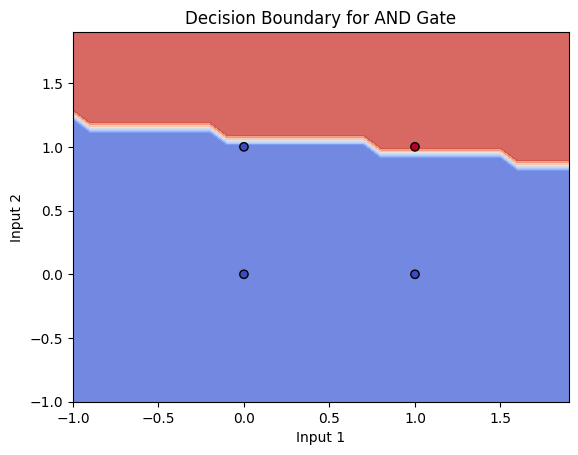

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plot decision boundary
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]

    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="coolwarm")
    plt.title(title)
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()

# Define the input and output for the OR gate
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input: two binary features
y_or = np.array([0, 1, 1, 1])  # Output: OR gate result

# Train the perceptron for OR gate
perceptron_or = SingleLayerPerceptron(learning_rate=0.1, epochs=1000)  # Increased epochs
perceptron_or.fit(X_or, y_or)

# Define the input and output for the AND gate
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input: two binary features
y_and = np.array([0, 0, 0, 1])  # Output: AND gate result

# Train the perceptron for AND gate
perceptron_and = SingleLayerPerceptron(learning_rate=0.1, epochs=1000)  # Increased epochs
perceptron_and.fit(X_and, y_and)

# Plot for OR Gate
plot_decision_boundary(X_or, y_or, perceptron_or, "Decision Boundary for OR Gate")

# Plot for AND Gate
plot_decision_boundary(X_and, y_and, perceptron_and, "Decision Boundary for AND Gate")


EXPERIMENT-3
##Multilayer perceptron Implementation and solving XOR problem
Implementing Multilayer percepton from dataset obtained thorugh scikit learn

1)The code loads the Iris dataset using scikit learn, which contains 4 features (sepal length, sepal width, petal length, and petal width) and the target variable (species of the flower).

2)An MLP (Multi-Layer Perceptron) model is created using MLPClassifier with 2 hidden layers, each having 10 neurons, and a maximum of 1000 training iterations.

3) The model is trained to make predcitons accourdingly

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np


data = load_iris()
X = data.data
y = data.target

# training and testing division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Mlp model
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Predict and evaluate
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9333333333333333


PLOT REPRESENTATION OF MLP

1)The decision boundary of the trained MLP model is visualized on the 2D feature space, showing how the model classifies different regions of the input space based on the features.

2)PCA is used to reduce the feature space of the training and test data

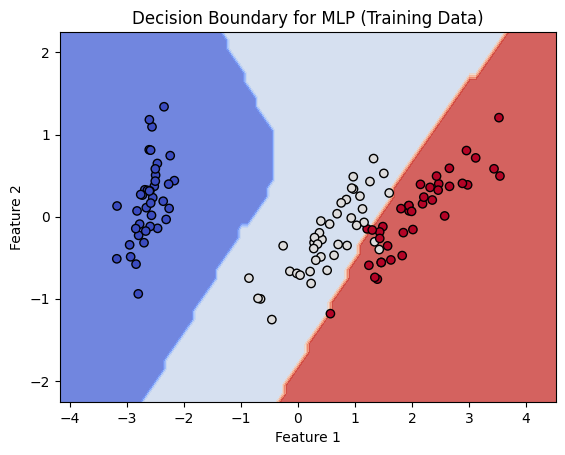

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# DB function
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="coolwarm")
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Training
mlp.fit(X_train_2d, y_train)

# Ploting
plot_decision_boundary(X_train_2d, y_train, mlp, "Decision Boundary for MLP (Training Data)")


#MLP for XOR problem
Defining Activation functions


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function  its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# derivative
def sigmoid_derivative(x):
    return x * (1 - x)


IMPLMENTING MLP
1) This code initializes weights and biases for the input-to-hidden and hidden-to-output layers randomly

2) Trains the model ,forward pass through the network, calculates the error, and updates the weights

3)Makes prediction and gives accuracy

In [ ]:
class MultiLayerPerceptron:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, epochs=10000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs

        # Initialize weights and biases
        self.weights_input_hidden = np.random.uniform(-1, 1, (self.input_size, self.hidden_size))
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.uniform(-1, 1, (self.hidden_size, self.output_size))
        self.bias_output = np.zeros((1, self.output_size))

    def fit(self, X, y):
        for epoch in range(self.epochs):
            # Forward pass
            hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
            hidden_output = sigmoid(hidden_input)

            final_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
            final_output = sigmoid(final_input)

            # Calculate error
            error = y - final_output

            #updation
            self.weights_hidden_output += self.learning_rate * np.dot(hidden_output.T, error)
            self.bias_output += self.learning_rate * np.sum(error, axis=0, keepdims=True)

            hidden_error = np.dot(error, self.weights_hidden_output.T)
            self.weights_input_hidden += self.learning_rate * np.dot(X.T, hidden_error * sigmoid_derivative(hidden_output))
            self.bias_hidden += self.learning_rate * np.sum(hidden_error * sigmoid_derivative(hidden_output), axis=0, keepdims=True)

    def predict(self, X):
        hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        hidden_output = sigmoid(hidden_input)

        final_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
        final_output = sigmoid(final_input)
        return np.round(final_output)
    def accuracy(self, X, y):
        predictions = self.predict(X)
        correct_predictions = np.sum(predictions == y)
        accuracy = correct_predictions / len(y) * 100
        return accuracy



XOR DATA IMPLEMENTATION

1) X_xor is a dataset that represents all possible input combinations for a 2-input XOR gate

2) y_xor contains the corresponding outputs.



In [ ]:
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])

TRAINING MLP
Trains the mlp model for XOR data

In [ ]:
mlp_xor = MultiLayerPerceptron(input_size=2, hidden_size=2, output_size=1, learning_rate=0.1, epochs=10000)
mlp_xor.fit(X_xor, y_xor)

PREDICTIONS MADE USING MPL


In [ ]:
y_pred_xor = mlp_xor.predict(X_xor)
print("Predictions for XOR Gate:")
print(y_pred_xor)

Predictions for XOR Gate:
[[0.]
 [1.]
 [1.]
 [0.]]


PLOTTING FOR MLP
Displays a plot to represent the predictions

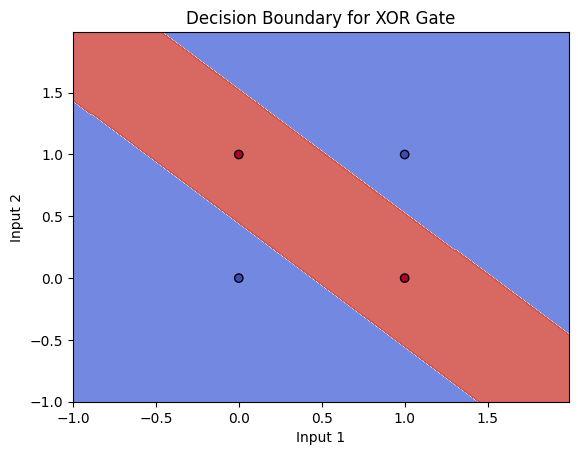

In [ ]:
# Decision boundary
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolor="k", cmap="coolwarm")
    plt.title(title)
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()

plot_decision_boundary(X_xor, y_xor, mlp_xor, "Decision Boundary for XOR Gate")


EXPERIMENT-4
##IMPLEMENTING ACTIVATION FUNCTIONS AND COMPARISION


IMPLEMENTING SIGMOID ACTIVATION FUNCTION

1)The sigmoid function is applied to a range of input values from -10 to 10.

2)A plot is created showing how the sigmoid function output

3)The graph visualizes the S-shaped curve

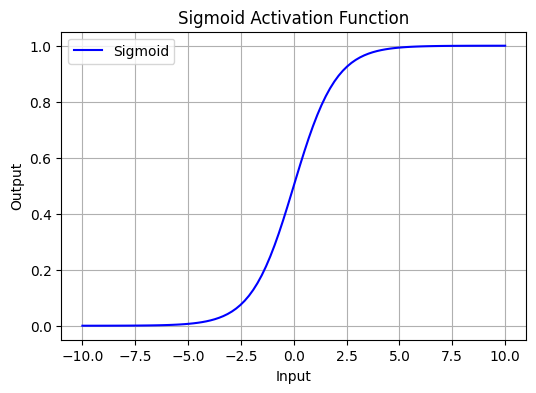

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Create a dataset
X = np.linspace(-10, 10, 100)
# Applying
sigmoid_output = sigmoid(X)

# Ploting
plt.figure(figsize=(6, 4))
plt.plot(X, sigmoid_output, label="Sigmoid", color='b')
plt.title("Sigmoid Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.show()


IMPLEMENTING RELU ACTIVATION FUNCTION

1)The sigmoid function is applied to a range of input values from -10 to 10.

2)A plot is created showing how the relu function output

3)The graph visualizes the ReLU activation function,
with a linear output for positive inputs and a flat zero line for negative inputs.

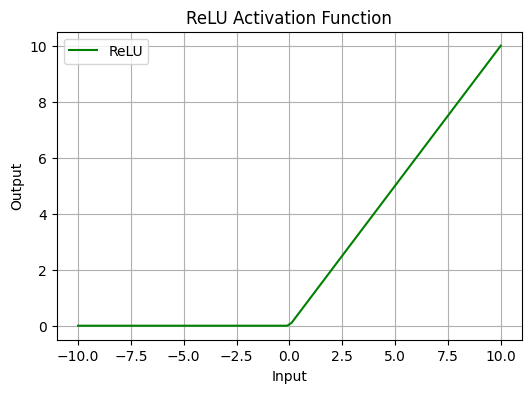

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Create a dataset
X = np.linspace(-10, 10, 100)

# Applying
relu_output = relu(X)

# Ploting
plt.figure(figsize=(6, 4))
plt.plot(X, relu_output, label="ReLU", color='g')
plt.title("ReLU Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.show()


IMPLEMENTING TANH ACTIVATION FUNCTION

1)The tanh function is applied to a range of input values from -10 to 10.

2)A plot is created showing how the tanh function output

3)The graph visualizes the S-shaped curve,around -1 and 1.


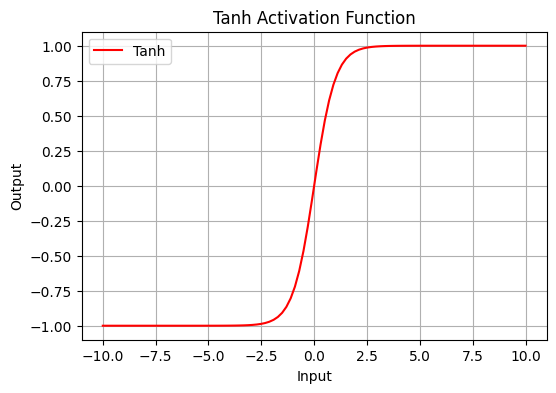

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Tanh activation function
def tanh(x):
    return np.tanh(x)

# Create a dataset
X = np.linspace(-10, 10, 100)

# Applying
tanh_output = tanh(X)

# Ploting
plt.figure(figsize=(6, 4))
plt.plot(X, tanh_output, label="Tanh", color='r')
plt.title("Tanh Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.show()


PLOT COMPARISION OF ACTIVATION FUNCTIONS

Makes graphical comparisions for all the activation fucntions

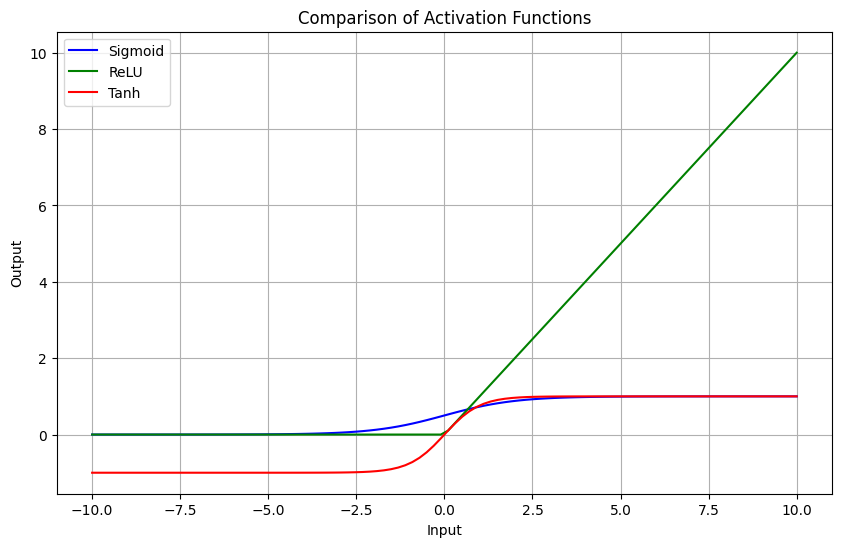

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Tanh activation function
def tanh(x):
    return np.tanh(x)

# Create a dataset
X = np.linspace(-10, 10, 100)

# Applying
sigmoid_output = sigmoid(X)
relu_output = relu(X)
tanh_output = tanh(X)

# Ploting
plt.figure(figsize=(10, 6))

plt.plot(X, sigmoid_output, label="Sigmoid", color='b')
plt.plot(X, relu_output, label="ReLU", color='g')
plt.plot(X, tanh_output, label="Tanh", color='r')

plt.title("Comparison of Activation Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()


NUMERICAL COMPARISION OF ACTIVATION FUNCTIONS

Makes numericalcomparisions for all the activation fucntions by creating a dataframe to compare

In [ ]:
import numpy as np
import pandas as pd

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Tanh activation function
def tanh(x):
    return np.tanh(x)

# Create a dataset
X = np.linspace(-10, 10, 100)

# Applying AF
sigmoid_output = sigmoid(X)
relu_output = relu(X)
tanh_output = tanh(X)

# Create a DataFrame
comparison_df = pd.DataFrame({
    'Input': X,
    'Sigmoid': sigmoid_output,
    'ReLU': relu_output,
    'Tanh': tanh_output
})

#comparison
print(comparison_df.head())


       Input   Sigmoid  ReLU  Tanh
0 -10.000000  0.000045   0.0  -1.0
1  -9.797980  0.000056   0.0  -1.0
2  -9.595960  0.000068   0.0  -1.0
3  -9.393939  0.000083   0.0  -1.0
4  -9.191919  0.000102   0.0  -1.0


EXPERIMENT-5
##Implementing forward andbackward propogation

FORWARD PROPOGATION

1)The forward propagation function computes the hidden layer output by applying weights and biases.

2)Applies Sigmoid activation function

3) Outputs the result

BACKWARD PROPOGATION

1)The backpropagation function calculates the error and gradients for both the output and hidden layers.

2)Using the derivative of the Sigmoid function.

3) Updates the weights and biases of the neural network using the gradients and the learning rate to minimize the error.

In [3]:
import numpy as np

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Initialize parameters
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)  # For reproducibility
    W1 = np.random.randn(hidden_size, input_size) * 0.01  # Weights for hidden layer
    b1 = np.zeros((hidden_size, 1))  # Bias for hidden layer
    W2 = np.random.randn(output_size, hidden_size) * 0.01  # Weights for output layer
    b2 = np.zeros((output_size, 1))  # Bias for output layer
    return W1, b1, W2, b2

# Forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    # Hidden layer computations
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)

    # Output layer computations
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    return Z1, A1, Z2, A2

# Compute cost
def compute_cost(Y, A2):
    m = Y.shape[1]  # Number of examples
    cost = -np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2)) / m
    return np.squeeze(cost)  # Ensure cost is a scalar

# Backpropagation
def backpropagation(X, Y, Z1, A1, Z2, A2, W2):
    m = X.shape[1]  # Number of examples

    # Output layer gradients
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    # Hidden layer gradients
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    return dW1, db1, dW2, db2

# Update parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# Train the neural network
def train_nn(X, Y, input_size, hidden_size, output_size, epochs, learning_rate):
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

    for i in range(epochs):
        # Forward propagation
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)

        # Compute cost
        cost = compute_cost(Y, A2)

        # Backpropagation
        dW1, db1, dW2, db2 = backpropagation(X, Y, Z1, A1, Z2, A2, W2)

        # Update parameters
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if i % 100 == 0:
            print(f"Epoch {i}: Cost = {cost:.4f}")

    return W1, b1, W2, b2

# Predict function
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    return (A2 > 0.5).astype(int)

# XOR Dataset
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])  # Inputs
Y = np.array([[0, 1, 1, 0]])  # Outputs

# Hyperparameters
input_size = 2
hidden_size = 2
output_size = 1
epochs = 10000
learning_rate = 0.1

# Train the neural network
W1, b1, W2, b2 = train_nn(X, Y, input_size, hidden_size, output_size, epochs, learning_rate)

# Make predictions
predictions = predict(X, W1, b1, W2, b2)
print("Predictions:", predictions)

Epoch 0: Cost = 0.6931
Epoch 100: Cost = 0.6931
Epoch 200: Cost = 0.6931
Epoch 300: Cost = 0.6931
Epoch 400: Cost = 0.6931
Epoch 500: Cost = 0.6931
Epoch 600: Cost = 0.6931
Epoch 700: Cost = 0.6931
Epoch 800: Cost = 0.6931
Epoch 900: Cost = 0.6931
Epoch 1000: Cost = 0.6931
Epoch 1100: Cost = 0.6931
Epoch 1200: Cost = 0.6931
Epoch 1300: Cost = 0.6931
Epoch 1400: Cost = 0.6931
Epoch 1500: Cost = 0.6931
Epoch 1600: Cost = 0.6931
Epoch 1700: Cost = 0.6931
Epoch 1800: Cost = 0.6931
Epoch 1900: Cost = 0.6931
Epoch 2000: Cost = 0.6931
Epoch 2100: Cost = 0.6931
Epoch 2200: Cost = 0.6931
Epoch 2300: Cost = 0.6931
Epoch 2400: Cost = 0.6931
Epoch 2500: Cost = 0.6931
Epoch 2600: Cost = 0.6931
Epoch 2700: Cost = 0.6931
Epoch 2800: Cost = 0.6931
Epoch 2900: Cost = 0.6931
Epoch 3000: Cost = 0.6931
Epoch 3100: Cost = 0.6931
Epoch 3200: Cost = 0.6931
Epoch 3300: Cost = 0.6931
Epoch 3400: Cost = 0.6931
Epoch 3500: Cost = 0.6931
Epoch 3600: Cost = 0.6931
Epoch 3700: Cost = 0.6931
Epoch 3800: Cost = 0.693